In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
#Importing the dataset
df=pd.read_csv("Churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
# Creating feature set and target set
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [145]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [146]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [147]:
''''from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Gender"]=le.fit_transform(x["Gender"])
x["Geography"]=le.fit_transform(x["Geography"])
x.head()'''

'\'from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nx["Gender"]=le.fit_transform(x["Gender"])\nx["Geography"]=le.fit_transform(x["Geography"])\nx.head()'

In [148]:
#Categorical encoding
geography=pd.get_dummies(x["Geography"],drop_first=True,dtype=int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [149]:
gender=pd.get_dummies(x['Gender'],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [150]:
#Concatenate the data frame
x=pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [151]:
#Drop unnecessary columns
x=x.drop(["Geography","Gender"],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [152]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [153]:
#Feature scaling to reduce the time for calculation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [154]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [155]:
#Initializing the ANN
classifier=Sequential()

In [156]:
#Adding the input layer and first hidden layer
classifier.add(Dense(6,kernel_initializer="he_uniform",activation="relu",input_dim=11))

In [157]:
#Adding the second hidden layer
classifier.add(Dense(6,kernel_initializer="he_uniform",activation="relu"))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer="he_uniform",activation="sigmoid"))

In [158]:
#Compiling ANN
classifier.compile(optimizer="Adamax",loss="binary_crossentropy",metrics=["accuracy"])

In [159]:
#Fitting the ANN to the training set
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 2ms/step - loss: 0.6595 - accuracy: 0.7358 - val_loss: 0.6172 - val_accuracy: 0.7891
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5695 - accuracy: 0.7888 - val_loss: 0.5580 - val_accuracy: 0.7936
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7910 - val_loss: 0.5283 - val_accuracy: 0.7963
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7916 - val_loss: 0.5101 - val_accuracy: 0.7970
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4971 - accuracy: 0.7925 - val_loss: 0.4977 - val_accuracy: 0.7978
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7929 - val_loss: 0.4877 - val_accuracy: 0.7982
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4783 - accuracy: 0.7929 - val_loss: 0.4794 - val_accuracy: 0.7982
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


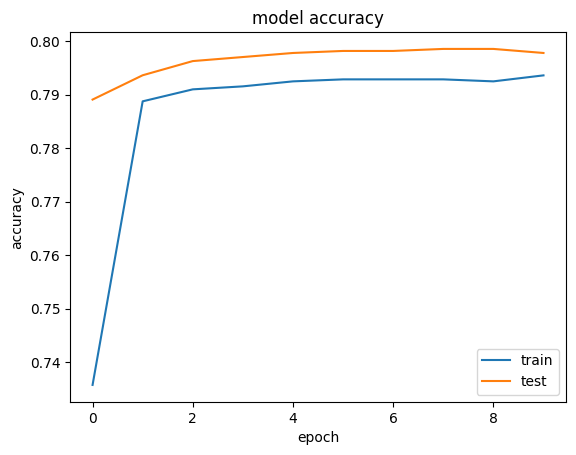

In [160]:
#List all data in history
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


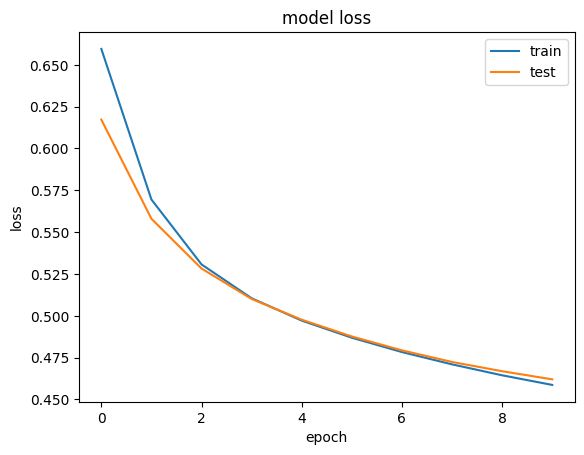

In [161]:
print(model_history.history.keys())
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper right")

In [162]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 823us/step


In [163]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [164]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64